In [184]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT2()
#Imports calibration data from csv files
modeldata = importakamadata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 14 fitted parameters, 10 of which have a bayesian prior
Total Residual:                        766.8
Components of residual:
Concentration Trajectories (Figure 2): 320.8
Initial Reaction Rate (Figure 3A):     161.8
Mg2PPi solubility (Figure 3B):         215.6
Parameter priors:                      68.7


In [182]:
function speciesaddition(t)
    a = zeros(18)
    a[7:10] .= 4e-3
    a[12] = 20e-3
    return a
end

speciesaddition (generic function with 1 method)

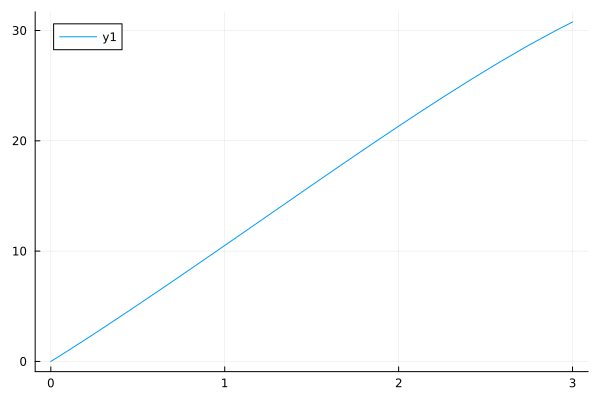

In [183]:
NTPconc = 4e-3
inputs = (T7RNAP = 1e-7, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = 2*NTPconc, Buffer = 0.040, DNA = 7.4, final_time = 3)
(lab,sol) = runfedbatch(akamafittedparams, inputs,speciesaddition,1, PPiase = 10.0)
plot(sol.t,totalrna((lab,sol),0))

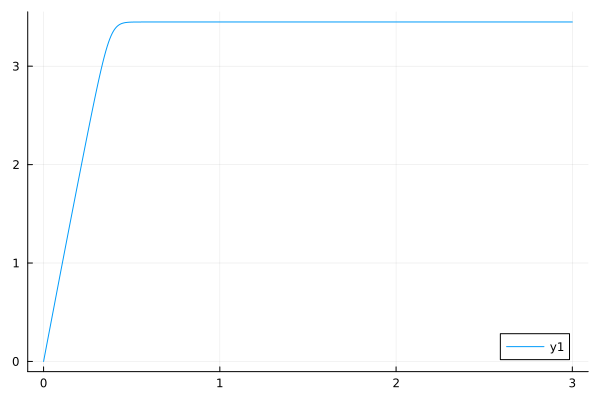

In [65]:
NTPconc = 0.25
inputs = (T7RNAP = 1e-7, ATP = NTPconc/4,UTP = NTPconc/4,CTP = NTPconc/4,GTP = NTPconc/4, Mg = 0.9*NTPconc, Buffer = 0.040, DNA = 7.4, final_time = 3)
sol = runDAE_batch(akamafittedparams, inputs)
plot(sol.t,totalrna(sol,0))